# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='.\Reacher_Windows_20\Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)




while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    if any(rewards) > 0.0:
        print(rewards)
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))


print(scores)

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from ddpg_agent import Agent
from collections import deque
import torch
import matplotlib.pyplot as plt
%matplotlib inline



def ddpg(n_episodes=400, max_t=1000, print_every=100):
    
    
    
    scores_deque = deque(maxlen=print_every)
    scores = []
    mean_scores = []

    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name] # reset environment
        states = env_info.vector_observations                   # get current state for each agent  
        agent.reset()     
        
        scores = np.zeros(num_agents)                           # initialize score for each agent
        for t in range(max_t):
            actions = agent.act(states, add_noise=True)         # select an action
            env_info = env.step(actions)[brain_name]            # send actions to environment
            next_states = env_info.vector_observations          # get next state
            rewards = env_info.rewards                          # get reward
            dones = env_info.local_done                         # see if episode has finished
      
            # save experience to replay buffer, perform learning step at defined interval
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done,t)             
            
            states = next_states
            scores += rewards        
            if np.any(dones):                                   # exit loop when episode ends
                break
                
                

        mean_scores.append(np.mean(scores))
        scores_deque.append(np.mean(scores))
        print(scores)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode,np.mean(scores), end=""))
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor3.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic3.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        if (np.mean(scores_deque) > 32.0 and i_episode > 100):
            break
            
    return mean_scores
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)
scores = ddpg()







[1.54999997 0.82999998 0.83999998 0.1        1.22999997 0.52999999
 0.48999999 0.98999998 0.65999999 0.54999999 0.95999998 0.66999999
 0.39999999 0.44999999 1.33999997 0.04       0.29999999 0.81999998
 0.05       0.45999999]
Episode 1	Average Score: 0.66
[0.89999998 0.36999999 1.23999997 0.53999999 0.38999999 0.15
 1.26999997 1.05999998 0.81999998 0.59999999 0.92999998 0.27999999
 0.27999999 0.38999999 0.83999998 0.55999999 1.00999998 0.23999999
 0.06       1.13999997]
Episode 2	Average Score: 0.65
[0.49999999 0.41999999 2.00999996 1.66999996 0.98999998 0.14
 1.51999997 0.32999999 3.01999993 1.28999997 1.18999997 1.67999996
 0.40999999 0.67999998 0.13       0.47999999 0.43999999 0.45999999
 0.13       0.54999999]
Episode 3	Average Score: 0.90
[1.34999997 0.36999999 0.53999999 0.40999999 0.47999999 0.69999998
 0.19       0.81999998 0.67999998 0.94999998 0.         0.48999999
 1.24999997 1.11999997 0.46999999 1.05999998 1.33999997 0.66999999
 0.54999999 0.66999999]
Episode 4	Average Scor

[27.31999939 27.33999939 20.71999954 28.82999936 25.13999944 24.53999945
 26.53999941 22.82999949 32.80999927 19.67999956 24.70999945 29.85999933
 30.45999932 22.4099995  21.97999951 21.79999951 25.97999942 23.63999947
 23.26999948 22.4799995 ]
Episode 33	Average Score: 25.12
[31.97999929 31.71999929 29.03999935 25.18999944 29.49999934 35.26999921
 39.39999912 29.01999935 32.73999927 28.77999936 26.7899994  28.45999936
 33.37999925 32.42999928 28.87999935 27.38999939 29.29999935 30.84999931
 29.64999934 31.60999929]
Episode 34	Average Score: 30.57
[30.35999932 32.59999927 29.45999934 29.35999934 33.48999925 27.70999938
 29.19999935 27.87999938 23.43999948 32.22999928 29.06999935 27.58999938
 35.24999921 26.05999942 26.8299994  30.73999931 26.35999941 28.13999937
 25.21999944 32.76999927]
Episode 35	Average Score: 29.19
[35.38999921 30.13999933 29.89999933 30.76999931 29.62999934 34.39999923
 32.37999928 26.9799994  35.6699992  30.51999932 33.08999926 28.77999936
 32.97999926 27.8099993

[38.39999914 35.06999922 39.53999912 38.90999913 38.77999913 35.37999921
 33.21999926 38.68999914 38.11999915 35.6799992  39.25999912 36.36999919
 36.87999918 39.02999913 39.13999913 37.51999916 39.53999912 38.39999914
 37.47999916 34.55999923]
Episode 63	Average Score: 37.50
[38.66999914 38.22999915 39.15999912 29.70999934 35.11999922 38.87999913
 38.07999915 38.02999915 35.8599992  39.46999912 30.80999931 38.17999915
 37.91999915 38.95999913 38.51999914 39.61999911 36.29999919 38.89999913
 26.15999942 37.98999915]
Episode 64	Average Score: 36.73
[38.02999915 29.22999935 38.69999913 39.25999912 39.21999912 38.22999915
 39.34999912 36.92999917 35.6999992  37.74999916 38.58999914 37.54999916
 39.14999912 38.37999914 38.26999914 38.46999914 37.75999916 34.25999923
 39.47999912 39.18999912]
Episode 65	Average Score: 37.67
[35.9899992  38.53999914 38.39999914 37.80999915 38.45999914 35.08999922
 38.99999913 37.39999916 39.14999912 38.75999913 38.12999915 34.84999922
 37.41999916 39.3099991

[39.29999912 38.49999914 39.29999912 38.96999913 37.94999915 38.27999914
 32.67999927 36.51999918 37.38999916 38.91999913 39.14999912 38.96999913
 38.41999914 38.54999914 38.77999913 39.30999912 39.37999912 39.50999912
 39.18999912 39.58999912]
Episode 93	Average Score: 38.43
[37.43999916 37.61999916 39.46999912 37.34999917 39.58999912 39.51999912
 38.93999913 38.76999913 39.01999913 38.71999913 39.35999912 38.57999914
 38.53999914 37.85999915 37.32999917 36.57999918 39.23999912 39.35999912
 39.07999913 39.39999912]
Episode 94	Average Score: 38.59
[39.30999912 39.03999913 39.18999912 38.94999913 38.87999913 37.00999917
 39.54999912 39.59999911 39.31999912 38.91999913 39.32999912 37.94999915
 37.87999915 39.48999912 38.34999914 39.28999912 38.85999913 39.34999912
 39.30999912 39.61999911]
Episode 95	Average Score: 38.96
[37.97999915 39.05999913 38.09999915 39.48999912 29.64999934 39.45999912
 38.46999914 31.1099993  37.07999917 39.49999912 37.15999917 36.75999918
 39.49999912 34.3999992

In [6]:
print(scores)

[0.6629999851807952, 0.6534999853931367, 0.9019999798387289, 0.7054999842308461, 0.9674999783746898, 0.8214999816380442, 1.1354999746195973, 1.231999972462654, 1.1459999743849039, 1.281999971345067, 1.6539999630302191, 1.7939999599009753, 2.078499953541905, 2.954499933961779, 3.425999923422933, 4.093999908491969, 4.543999898433685, 5.468999877758324, 8.233499815966933, 7.605999829992652, 10.095999774336814, 11.287499747704715, 11.888499734271317, 12.275499725621193, 15.574499651882798, 15.729499648418278, 19.934499554429202, 19.505499564018102, 22.56899949554354, 19.387499566655606, 21.86949951117858, 25.12199943847954, 25.1169994385913, 30.568999316729606, 29.187999347597362, 30.600499316025527, 33.99449924016371, 34.569999227300286, 35.59099920447916, 34.85849922085181, 35.573499204870316, 35.6559992030263, 33.7019992467016, 36.73799917884171, 36.538499183300885, 37.90199915282428, 37.52399916127324, 36.076499193627384, 37.17099916916341, 36.31899918820709, 36.1244991925545, 38.06899

In [7]:
i=0
total_score = 0
avg_scores = []
scores_deque = deque(maxlen=100)
last100_avg = []
for score in scores:
    i +=1
    scores_deque.append(score)
    total_score += score
    avg_scores.append(total_score/i)
    last100_avg.append(np.mean(scores_deque))

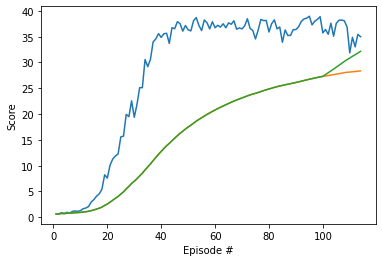

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(1, len(scores)+1), avg_scores)
plt.plot(np.arange(1, len(scores)+1), last100_avg)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [5]:
from ddpg_agent import Agent
import torch

env_info = env.reset(train_mode=False)[brain_name]
# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

agent = Agent(state_size=state_size, action_size=action_size, random_seed=10)
agent.actor_local.load_state_dict(torch.load('./checkpoint_actor3.pth'))

states = env_info.vector_observations  # get the current states
scores = np.zeros(num_agents)                           # initialize score for each agent

agent.reset()
for t in range(1000):
    actions = agent.act(states, False)            # let the agent select actions (don't add noise)
    env_info = env.step(actions)[brain_name]      # execute the selected actions and save the new information about the environment
    next_states = env_info.vector_observations    # get the resulting states
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                   # check whether episodes have finished
    
    states = next_states
    scores += rewards 
    if np.any(dones):
        break 
env.close()

print(scores)

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  7.90150833e+00 -1.00000000e+00
  1.25147629e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -5.22214413e-01]
[34.56999923 31.00999931 37.52999916 39.59999911 36.49999918 39.52999912
 39.21999912 33.46999925 32.12999928 39.48999912 39.49999912 37.87999915
 37.17999917 34.97999922 32.33999928 33.06999926 34.40999923 39.10999913
 39.46999912 36.63999918]
